<a href="https://colab.research.google.com/github/Rafaabreu1/Rafaabreu1/blob/main/Projeto_An%C3%A1lise_Explorat%C3%B3ria_da_empresa_Loggi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Contexto***

Área= Logística

Empresa= Loggi

Problema de Negócio:

Otimização das rotas de entrega, achar o melhor caminho para ir do ponto A até o ponto B de modo que seja rápido e eficaz

Locação de entrega nos veiculos da frota, os carros moto ou caminhôes tem carga limitada e seus pacotes precisão ser distribuidos de forma correta em cada um, economizando combustível e otimizando o processo de entrega e facilitando o trabalho do entregador.

O objetivo é gerar gráficos e insights para uma melhor visualização e entendimento do sistema de entrega da loggi na região de brasilia.


In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json



# **Pacotes e Bibliotecas**

In [ ]:
import json
import pandas as pd
import geopy
import numpy
import geopandas
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploração de dados**

In [ ]:

with open('deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)

In [ ]:

deliveries_df = pd.DataFrame(data)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
#normalizar a coluna origin
hub_origin_df = pd.json_normalize(deliveries_df['origin'])
hub_origin_df.head()



,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


In [ ]:
#concatenar a primeira tabela coma segunda métodos right e left
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df.head()


,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


In [ ]:
#excluir a coluna origin e renomear  as colunas lng e lat
deliveries_df = deliveries_df.drop('origin', axis=1)
deliveries_df = deliveries_df[["name", "region","lng", "lat", "vehicle_capacity", "deliveries"]]
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
#renomear as colunas lng e lat
deliveries_df = deliveries_df.rename(columns={'lng':'hub_lng', 'lat':'hub_lat'})
deliveries_df.head()



,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [ ]:
#criar um explosed na coluna deliveries
deliveries_exploded_df = deliveries_df[["deliveries"]].explode('deliveries')
deliveries_exploded_df.head()


,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [ ]:
deliveries_normalized_df = pd.concat([
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['size'])).rename(columns={'deliveries':'delivery_size'}),
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['point']['lng'])).rename(columns={'deliveries':'delivery_lng'}),
    pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['point']['lat'])).rename(columns={'deliveries':'delivery_lat'}),
], axis=1)
deliveries_normalized_df.head()



,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


In [ ]:
deliveries_df = deliveries_df.drop('deliveries', axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [ ]:
#criar uma dataframe com as colunas region, hub_lng e hub_lab que não tenha dados duplicados, e que o dataframe chame hub_df
hub_df = deliveries_df[['region', 'hub_lng', 'hub_lat']].drop_duplicates().reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-2,-48.054989,-15.838145
1,df-1,-47.893662,-15.805118
2,df-0,-47.802665,-15.657014


# **Manipulação**

In [ ]:
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent="ebac")
location= geolocator.reverse('-15.657014, -47.802665')
print (json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 14416233,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656915980217473",
  "lon": "-47.802644868369704",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.053411383993285995,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-202, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "st

In [ ]:
from geopy.extra.rate_limiter import RateLimiter
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)
hub_df['coordenates'] = hub_df['hub_lat'].astype(str) + ',' + hub_df['hub_lng'].astype(str)
hub_df ['geodata']= hub_df['coordenates'].apply(geocoder)
hub_df.head()

,region,hub_lng,hub_lat,coordenates,geodata
0,df-2,-48.054989,-15.838145,"-15.83814451122274,-48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334,-47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-0,-47.802665,-15.657014,"-15.657013854445248,-47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."


In [ ]:
#normalizar a coluna geodata
hub_geodata_df = pd.json_normalize(hub_df['geodata'].apply(lambda data: data.raw))
hub_geodata_df.head()



,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.suburb,address.residential,address.town
0,11654896,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.000051,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,NaN,NaN,NaN
1,14619249,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172753950067,-47.89372354453109,highway,residential,26,0.053411,...,Distrito Federal,BR-DF,Região Centro-Oeste,70336-000,Brasil,br,SQS 303,Asa Sul,NaN,NaN
2,14416233,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.053411,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,Sobradinho,Quadra 2,Sobradinho


In [ ]:
hub_geodata_df = hub_geodata_df[['address.road', 'address.suburb', 'address.town', 'address.city']]
hub_geodata_df['address.city'] = hub_geodata_df['address.city'].fillna(hub_geodata_df['address.town'])
hub_geodata_df['address.suburb'] = hub_geodata_df['address.suburb'].fillna(hub_geodata_df['address.city'])
hub_geodata_df = hub_geodata_df.drop('address.town', axis=1)
hub_geodata_df = hub_geodata_df.rename(columns={'address.road':'hub_road', 'address.suburb':'hub_suburb', 'address.city':'hub_city'})
hub_geodata_df.head()

<ipython-input-161-4f57284b2e4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df['address.city'] = hub_geodata_df['address.city'].fillna(hub_geodata_df['address.town'])
<ipython-input-161-4f57284b2e4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df['address.suburb'] = hub_geodata_df['address.suburb'].fillna(hub_geodata_df['address.city'])


,hub_road,hub_suburb,hub_city
0,CSB 4/5,Taguatinga,Taguatinga
1,SQS 303,Asa Sul,Brasília
2,Rua 7,Sobradinho,Sobradinho


In [ ]:
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, how='inner', left_index=True, right_index=True)
hub_df.head()
hub_df = hub_df[['region', 'hub_road', 'hub_suburb', 'hub_city']]
hub_df.head()

,region,hub_road,hub_suburb,hub_city
0,df-2,CSB 4/5,Taguatinga,Taguatinga
1,df-1,SQS 303,Asa Sul,Brasília
2,df-0,Rua 7,Sobradinho,Sobradinho


In [ ]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_df, how='inner', on='region')
deliveries_df = deliveries_df[['name', 'region', 'hub_lng', 'hub_lat', 'hub_road', 'hub_suburb', 'hub_city', 'vehicle_capacity', 'delivery_size', 'delivery_lng', 'delivery_lat']]
deliveries_df.head()


,name,region,hub_lng,hub_lat,hub_road,hub_suburb,hub_city,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


In [ ]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv

In [ ]:

deliveries_geodata_df = pd.read_csv('deliveries-geodata.csv')
deliveries_geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [ ]:

deliveries_df = pd.merge(left=deliveries_df, right=deliveries_geodata_df[['delivery_city', 'delivery_suburb']], how='inner', left_index=True, right_index=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_road,hub_suburb,hub_city,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [ ]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

replace ./maps/ASB_Cemiterio_A.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#localização distrito federal dataframe chamado mapa
mapa= geopandas.read_file("distrito-federal.shp")
mapa= mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0, -47.31057 -..."


In [ ]:
hub_df=deliveries_df[["region", "hub_lng", "hub_lat"]]
geo_hub_df=geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df.hub_lng, hub_df.hub_lat))
geo_hub_df.head()


,region,hub_lng,hub_lat,geometry
0,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
1,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
2,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
3,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)
4,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)


In [ ]:
geo_delivery_df=geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df.delivery_lng, deliveries_df.delivery_lat))
geo_delivery_df.head()

,name,region,hub_lng,hub_lat,hub_road,hub_suburb,hub_city,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb,geometry
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul,POINT (-48.11619 -15.84893)
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul,POINT (-48.11819 -15.85077)
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul,POINT (-48.11248 -15.84787)
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul,POINT (-48.11802 -15.84647)
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,CSB 4/5,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol,POINT (-48.1149 -15.85805)


# **Visualizaçao**

<ipython-input-170-059af4f89d0b>:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


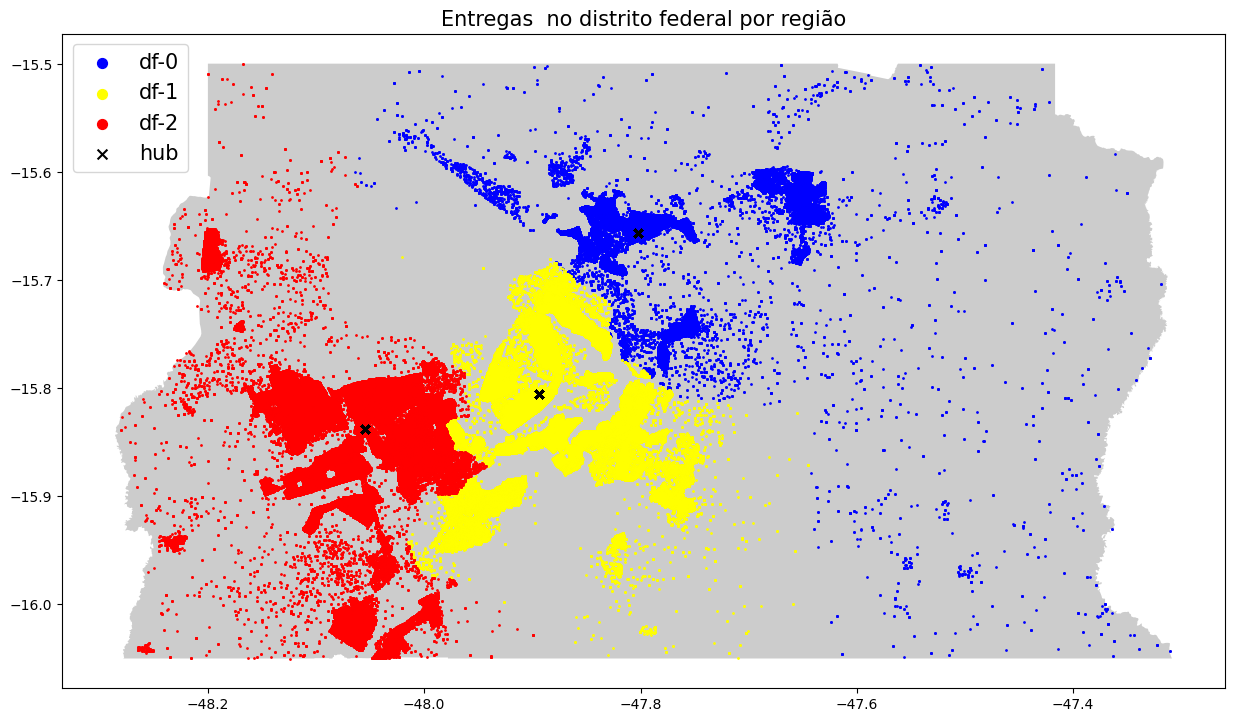

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
mapa.plot(ax=ax, alpha=0.4, color='grey')

geo_delivery_df.query("region=='df-0'").plot(ax=ax, markersize=1, color='blue', marker='o', label='df-0')
geo_delivery_df.query("region=='df-1'").plot(ax=ax, markersize=1, color='yellow', marker='o', label='df-1')
geo_delivery_df.query("region=='df-2'").plot(ax=ax, markersize=1, color='red', marker='o', label='df-2')

geo_hub_df.plot(ax=ax, markersize=30, color='black', marker='x', label='hub')


plt.title("Entregas  no distrito federal por região", fontdict={'fontsize':15})
lgnd=plt.legend(prop={'size':15})
for handle in lgnd.legendHandles:
  handle.set_sizes([50])


***A partir do mapa, é possível identificar padrões distintos nas regiões analisadas:***

* Na região df-0, as entregas estão mais espalhadas, resultando em uma maior distância média entre o hub e os pontos de entrega. Apesar disso, o hub está estrategicamente localizado próximo à área com maior concentração de entregas.

* Região df-1: As entregas estão bem concentradas em uma área reduzida, predominantemente na região central de Brasília, facilitando a logística e minimizando as distâncias percorridas. Notavelmente, a maioria das entregas ocorre em áreas ocupadas por pessoas com alto poder aquisitivo

* Na região df-2, embora a maioria das entregas esteja concentrada em uma área específica, observa-se um número considerável de entregas dispersas e mais distantes da região principal, aumentando a variabilidade nas rotas de entrega.

* Esses padrões podem ser usados para otimizar o planejamento logístico e a distribuição de recursos entre as regiões.








In [ ]:
data=pd.DataFrame(deliveries_df[["region", "vehicle_capacity"]].value_counts(normalize=True)).reset_index()
data.rename(columns={0:'region_percentage'}, inplace=True)
data.head()

,region,vehicle_capacity,proportion
0,df-1,180,0.478988
1,df-2,180,0.410783
2,df-0,180,0.110229


Text(0.5, 1.0, 'Proporção de entregas por região')

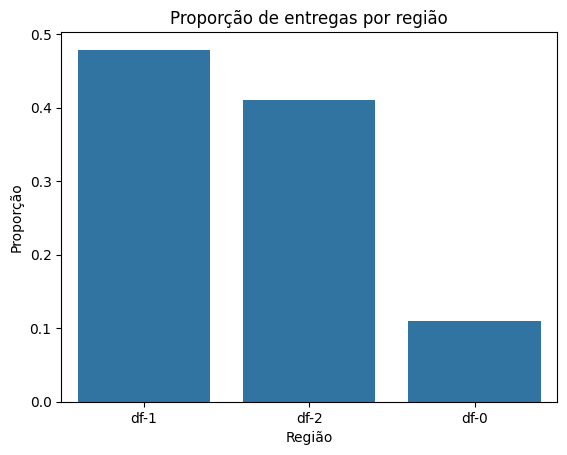

In [ ]:
grafico = sns.barplot(x='region', y='proportion', data=data)
mapa.plot(ax=ax,)
plt.xlabel("Região")
plt.ylabel("Proporção")
plt.title("Proporção de entregas por região")



***De acordo com o gráfico de barras, observa-se que:***

*   O hub df-0 possui a menor proporção de entregas, cerca de 10%, significativamente inferior aos outros hubs.
*   O hub df-2 concentra aproximadamente 40% das entregas, sendo a segunda maior proporção.
*  O hub df-1 registra a maior proporção de entregas, em torno de 50%, o que pode ser atribuído à sua localização na região central, onde residem pessoas com maior poder aquisitivo.
*   Essa distribuição reflete tanto a densidade populacional quanto as características socioeconômicas das áreas atendidas pelos hubs.





In [ ]:
data=pd.DataFrame(geo_delivery_df[["region", "delivery_suburb"]].value_counts(normalize=True)).reset_index()
data.rename(columns={0:'delivery_suburb_percentage'}, inplace=True)
data.head()


,region,delivery_suburb,proportion
0,df-1,Brasília,0.112952
1,df-1,Asa Norte,0.102368
2,df-2,Taguatinga,0.084634
3,df-1,Asa Sul,0.079158
4,df-2,Águas Claras,0.075599


Text(0.5, 1.0, ' 10 suburbios com o maior índice de entrega')

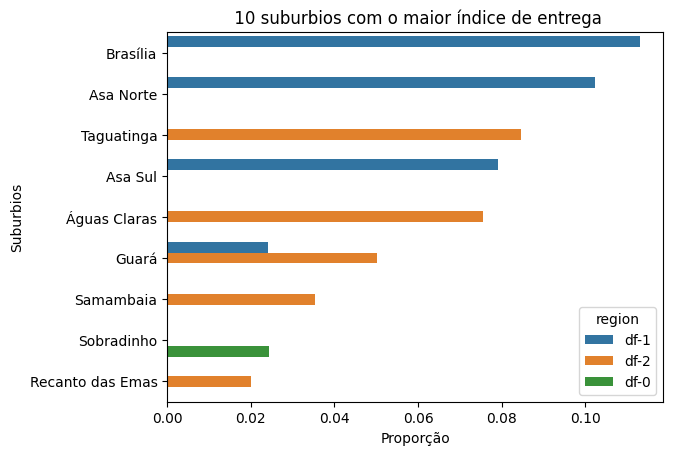

In [ ]:
grafico = sns.barplot(x='proportion', y='delivery_suburb', data=data.head(10), hue='region')
mapa.plot(ax=ax)
plt.xlabel("Proporção")
plt.ylabel("Suburbios")
plt.title(" 10 suburbios com o maior índice de entrega")


***Análise das entregas por suburbios ***

*  A partir do gráfico de barras, nota-se que os 10 subúrbios com maior demanda de entregas não estão concentrados apenas na região df-1. A distribuição é a seguinte:

*  4 subúrbios estão na região df-1, incluindo Brasília, que lidera com a maior quantidade de entregas. Essa concentração reflete o alto poder aquisitivo dos moradores dessa área central.

*  5 subúrbios pertencem à região df-2, indicando uma demanda significativa mesmo fora da área central.

* 1 subúrbio está localizado na região df-0, mostrando que, apesar da baixa proporção geral de entregas nessa região, ela ainda abriga um subúrbio entre os 10 mais demandados.

* Essa distribuição evidencia que, embora o poder aquisitivo e a centralidade da região df-1 sejam fatores importantes, outros subúrbios em regiões periféricas também apresentam alta demanda de entregas.


Text(0.5, 1.0, ' 10 suburbios com o menor índice de entrega')

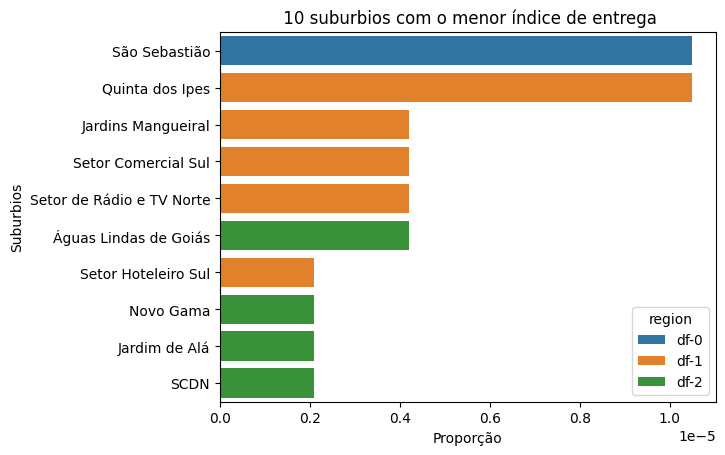

In [ ]:
grafico = sns.barplot(x='proportion', y='delivery_suburb', data=data.tail(10), hue='region')
mapa.plot(ax=ax)
plt.xlabel("Proporção")
plt.ylabel("Suburbios")
plt.title(" 10 suburbios com o menor índice de entrega")

***Este gráfico evidencia os 10 subúrbios com os piores índices de entrega, revelando os seguintes padrões:***

* Região df-1: Metade dos subúrbios (5) com os piores índices de entrega está localizada nesta região, destacando que, apesar de ter a maior concentração de entregas, também apresenta uma proporção significativa de subúrbios com baixo desempenho logístico.

* Região df-2: Conta com 4 subúrbios entre os 10 piores índices de entrega, indicando desafios logísticos relevantes, embora menos concentrados do que na região df-1.

* Região df-0: Apenas 1 subúrbio da região aparece entre os piores índices, reforçando que, apesar do menor volume de entregas, os desafios logísticos são relativamente menores em termos de abrangência.

* Esses dados mostram que os subúrbios com os piores índices de entrega não estão necessariamente concentrados na região com menor volume total de entregas, mas sim em áreas específicas, principalmente no df-1, que abriga a maior quantidade de subúrbios problemáticos em termos de desempenho logístico.





In [ ]:
data=pd.DataFrame(geo_delivery_df[["region", "delivery_suburb", "delivery_size"]].value_counts(normalize=True)).reset_index()
data.rename(columns={0:'delivery_suburb'}, inplace=True)
data=data.drop_duplicates(subset=['delivery_suburb'])
data.head()


,region,delivery_suburb,delivery_size,proportion
0,df-1,Brasília,2,0.011580
10,df-1,Asa Norte,8,0.010794
20,df-2,Taguatinga,8,0.008985
29,df-1,Asa Sul,10,0.008151
39,df-2,Águas Claras,2,0.007708


Text(0, 0.5, 'Tamanho da entrega')

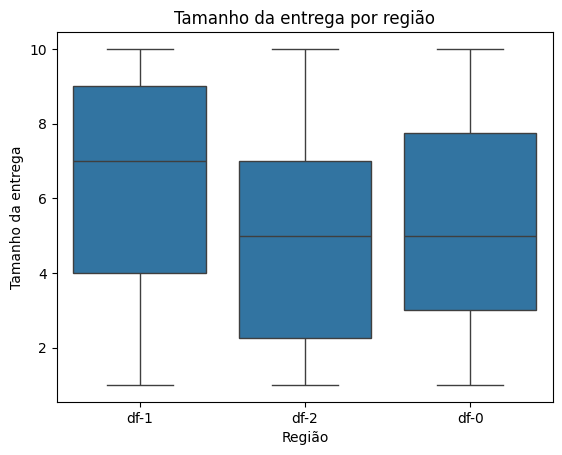

In [ ]:
grafico = sns.boxplot(x='region', y='delivery_size', data=data)
plt.title("Tamanho da entrega por região")
plt.xlabel("Região")
plt.ylabel("Tamanho da entrega")

***Este gráfico de boxplot ilustra a frequência do tamanho das entregas por região, destacando as seguintes observações:***

*  Região df-1: A maior parte das entregas varia entre 4 e 9, com pequenas quantidades indo de 1 a 10, mostrando que essa região apresenta as maiores entregas em média.

* Região df-2: A maioria dos tamanhos das entregas varia entre 2,5 e 7, com alguns casos se estendendo de 1 a 10, indicando entregas menores em comparação com as outras regiões.

*  Região df-0: A maioria das entregas está entre 3 e 7,5, com variações de 1 a 10, demonstrando um padrão intermediário entre as regiões df-1 e df-2.

* Conclui-se que, embora todas as regiões apresentem tamanhos de entrega variando de 1 a 10, a região df-2 tem a menor frequência de entregas maiores, enquanto a região df-1 concentra as maiores entregas, além de apresentar a maior amplitude frequencial.

